2.2.1

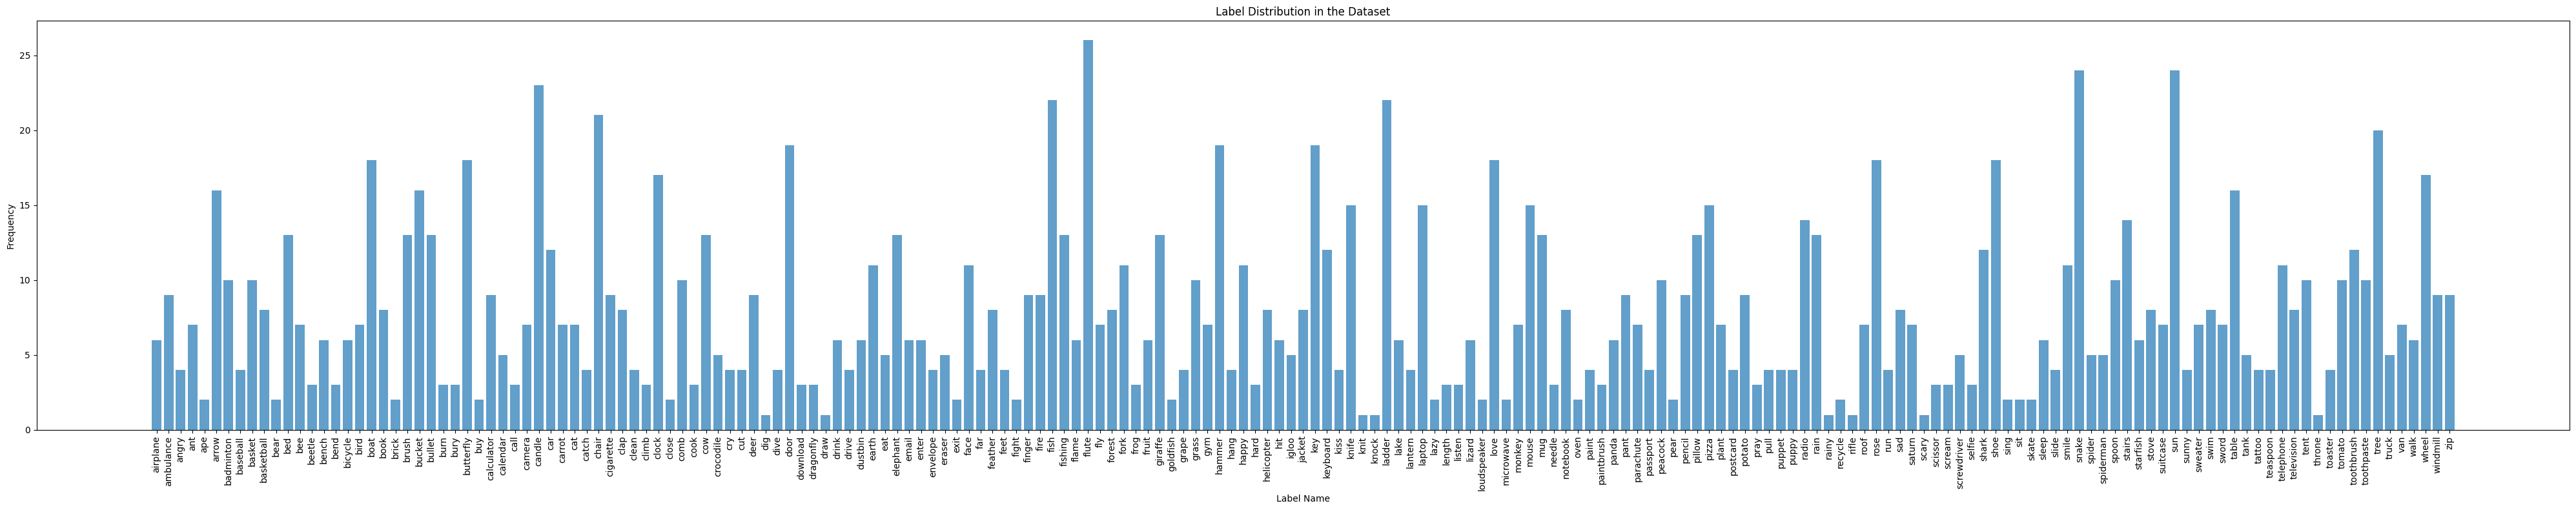

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('data.npy', allow_pickle=True)
labels = data[:, 3]

unique_labels, label_counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(40, 8))
plt.bar(unique_labels, label_counts, align='center', alpha=0.7)
plt.xlabel('Label Name')
plt.ylabel('Frequency')
plt.title('Label Distribution in the Dataset')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


2.3.1

In [7]:
import numpy as np
import time
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
class KNNClassifier:
    def __init__(self, k=5, distance_metric='manhattan', encoder_type=None):
        self.k = k
        self.distance_metric = distance_metric
        self.encoder_type = encoder_type
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
    def train_val_split(self,X, y, test_size=0.2, random_state=42):
        np.random.seed(random_state)
        indices = np.random.permutation(len(X))
        split_index = int(len(X) * (1 - test_size))
        train_indices, val_indices = indices[:split_index], indices[split_index:]
        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_val]
            
        return x_train, x_val, y_train, y_val

    def unshuffled_train_val_split(self,X,y,test_size=0.2):
        total_samples = len(X)
        split_index = int(total_samples * (1 - test_size))

        X_train = X[:split_index]
        X_test = X[split_index:]
        y_train = y[:split_index]
        y_test = y[split_index:]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_test]
        return x_train, x_val, y_train, y_test
    def fit(self, data):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_vit, y)
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_resnet, y)

    def euclidean_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=2)
    def manhattan_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=1)
    def cosine_distance(self, x1, x2) -> float:
        return 1-np.dot(x2,x1)/(np.linalg.norm(x2,axis=1)*np.linalg.norm(x1))
    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return self.manhattan_distance(x1, x2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(x1, x2)
        else:
            raise ValueError("Unsupported distance metric")
    def fitpt2(self, data, X_test):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train = X_vit
            self.y_train = y
            self.X_test = X_test
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train = X_resnet
            self.y_train = y
            self.X_test = X_test
        
    def predict(self):
        y_pred = []
        for x in self.X_test:
            distances = self.calculate_distance(x, self.X_train)
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            pred_label = unique_labels[np.argmax(counts)]
            y_pred.append(pred_label)
        print(self.encoder_type)
        print("Accuracy:" + str(accuracy_score(self.y_test,y_pred)))
        print("F1 Score:" + str(f1_score(self.y_test,y_pred,average='macro')))
        print("Precision score:" + str(precision_score(self.y_test,y_pred,average='macro',zero_division=0)))
        print("Recall score:" + str(recall_score(self.y_test,y_pred,average='macro',zero_division=0)))
def train_val_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_index = int(len(X) * (1 - test_size))
    train_indices, val_indices = indices[:split_index], indices[split_index:]
    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]
    x_train = [item[0][0] for item in X_train]
    x_val = [item[0][0] for item in X_val]
        
    return x_train, x_val, y_train, y_val
data = np.load('data.npy', allow_pickle=True)
X_vit = data[:, 2:3]
y = data[:, 3] 
X_train, X_test, y_train, y_test = train_val_split(X_vit, y)
knn_classifier = KNeighborsClassifier()
vit_knn = KNNClassifier(k=3, distance_metric='euclidean',encoder_type='VIT')
vit_knn.fit(data=data)
vit_knn.predict()
resnet_knn = KNNClassifier(k=5, distance_metric='cosine',encoder_type='Resnet')
resnet_knn.fit(data=data)
resnet_knn.predict()



VIT
Accuracy:0.23
F1 Score:0.11996945864592923
Precision score:0.13472041847041846
Recall score:0.13798363095238092
Resnet
Accuracy:0.18666666666666668
F1 Score:0.09991161683743176
Precision score:0.09919613295409473
Recall score:0.12427964816499847


2.4.1.1 & 2.4.1.2

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
class KNNClassifier:
    def __init__(self, k=5, distance_metric='manhattan', encoder_type=None):
        self.k = k
        self.distance_metric = distance_metric
        self.encoder_type = encoder_type
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
    def train_val_split(self,X, y, test_size=0.2, random_state=42):
        np.random.seed(random_state)
        indices = np.random.permutation(len(X))
        split_index = int(len(X) * (1 - test_size))
        train_indices, val_indices = indices[:split_index], indices[split_index:]
        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_val]
            
        return x_train, x_val, y_train, y_val

    def unshuffled_train_val_split(self,X,y,test_size=0.2):
        total_samples = len(X)
        split_index = int(total_samples * (1 - test_size))

        X_train = X[:split_index]
        X_test = X[split_index:]
        y_train = y[:split_index]
        y_test = y[split_index:]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_test]
        return x_train, x_val, y_train, y_test
    def fit(self, data):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_vit, y)
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_resnet, y)

    def euclidean_distance(self, x1, x2):
        # return np.sqrt(np.sum((x1 - x2) ** 2),axis=1)
        return np.linalg.norm(x1-x2,axis=1,ord=2)

    def manhattan_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=1)

    def cosine_distance(self, x1, x2):
        return 1-np.dot(x2,x1)/(np.linalg.norm(x2,axis=1)*np.linalg.norm(x1))

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return self.manhattan_distance(x1, x2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(x1, x2)
        else:
            raise ValueError("Unsupported distance metric")
    def fitpt2(self, data, X_test):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train = X_vit
            self.y_train = y
            self.X_test = X_test
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train = X_resnet
            self.y_train = y
            self.X_test = X_test
        
    def predict(self):
        y_pred = []
        for x in self.X_test:
            distances = self.calculate_distance(x, self.X_train)
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            pred_label = unique_labels[np.argmax(counts)]
            y_pred.append(pred_label)
        return accuracy_score(self.y_test,y_pred)
    
data = np.load('data.npy', allow_pickle=True)
k_value = []
accuracy = []
answer = []
for i in ['VIT', 'Resnet']:
    for j in ['manhattan', 'euclidean', 'cosine']:
        for kk in range(1,10,2):
            knn = KNNClassifier(k=kk,distance_metric=j,encoder_type=i)
            knn.fit(data=data)
            ans = knn.predict()
            answer.append([ans,kk,j,i])
            k_value.append(i)
            accuracy.append(ans)
answer.sort(reverse=True)
print("The best triplet is: ")
print("K = " + str(answer[0][1]))
print("Distance metric = " + str(answer[0][2]))
print("Encoder type: " + str(answer[0][3]))
j=0
print()
print("The top 20 triplets are: ")
for i in answer:
    print(i)
    j += 1
    if(j == 20):
        break

The best triplet is: 
K = 7
Distance metric = manhattan
Encoder type: VIT

The top 20 triplets are: 
[0.27666666666666667, 7, 'manhattan', 'VIT']
[0.2633333333333333, 7, 'cosine', 'VIT']
[0.2633333333333333, 1, 'euclidean', 'VIT']
[0.26, 5, 'euclidean', 'VIT']
[0.26, 1, 'manhattan', 'VIT']
[0.25666666666666665, 7, 'euclidean', 'VIT']
[0.25666666666666665, 1, 'cosine', 'VIT']
[0.25, 9, 'euclidean', 'VIT']
[0.25, 5, 'manhattan', 'VIT']
[0.24666666666666667, 9, 'manhattan', 'VIT']
[0.24666666666666667, 9, 'cosine', 'VIT']
[0.24333333333333335, 5, 'cosine', 'VIT']
[0.23, 3, 'euclidean', 'VIT']
[0.22333333333333333, 9, 'manhattan', 'Resnet']
[0.22333333333333333, 3, 'manhattan', 'VIT']
[0.22, 3, 'cosine', 'VIT']
[0.2, 9, 'cosine', 'Resnet']
[0.2, 5, 'manhattan', 'Resnet']
[0.19333333333333333, 9, 'euclidean', 'Resnet']
[0.19333333333333333, 7, 'manhattan', 'Resnet']


2.4.1.3

[1, 3, 5, 7, 9]
[0.2633333333333333, 0.23, 0.26, 0.25666666666666665, 0.25]


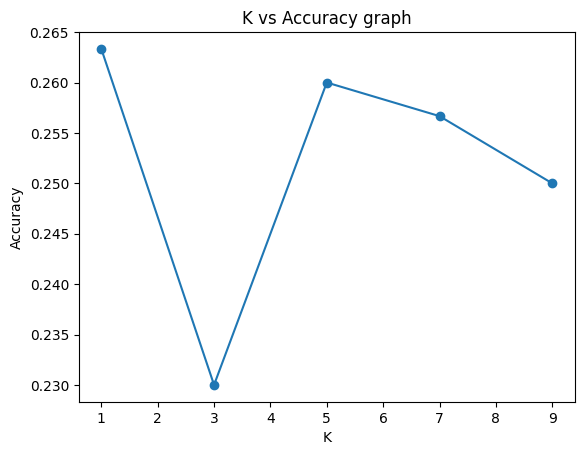

In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
class KNNClassifier:
    def __init__(self, k=5, distance_metric='manhattan', encoder_type=None):
        self.k = k
        self.distance_metric = distance_metric
        self.encoder_type = encoder_type
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
    def train_val_split(self,X, y, test_size=0.2, random_state=42):
        np.random.seed(random_state)
        indices = np.random.permutation(len(X))
        split_index = int(len(X) * (1 - test_size))
        train_indices, val_indices = indices[:split_index], indices[split_index:]
        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_val]
            
        return x_train, x_val, y_train, y_val

    def unshuffled_train_val_split(self,X,y,test_size=0.2):
        total_samples = len(X)
        split_index = int(total_samples * (1 - test_size))

        X_train = X[:split_index]
        X_test = X[split_index:]
        y_train = y[:split_index]
        y_test = y[split_index:]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_test]
        return x_train, x_val, y_train, y_test
    def fit(self, data):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_vit, y)
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_resnet, y)

    def euclidean_distance(self, x1, x2):
        # return np.sqrt(np.sum((x1 - x2) ** 2),axis=1)
        return np.linalg.norm(x1-x2,axis=1,ord=2)

    def manhattan_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=1)

    def cosine_distance(self, x1, x2):
        return 1-np.dot(x2,x1)/(np.linalg.norm(x2,axis=1)*np.linalg.norm(x1))

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return self.manhattan_distance(x1, x2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(x1, x2)
        else:
            raise ValueError("Unsupported distance metric")
    def fitpt2(self, data, X_test):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train = X_vit
            self.y_train = y
            self.X_test = X_test
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train = X_resnet
            self.y_train = y
            self.X_test = X_test
        
    def predict(self):
        y_pred = []
        #print(len(X_test[0][0]))
        #print(X_test)
        for x in self.X_test:
            #print(x)
            #distances = [self.calculate_distance(x[0][0], x_train[0][0]) for x_train in self.X_train]
            #self.X_train = self.X_train[0]
            # print(len(self.X_train))
            # print(len(x[0][0]))
            distances = self.calculate_distance(x, self.X_train)
            # distances = np.array([self.calculate_distance(x[0][0], x_train[0][0]) for x_train in self.X_train])
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            pred_label = unique_labels[np.argmax(counts)]
            y_pred.append(pred_label)
        return accuracy_score(self.y_test,y_pred)
        #return np.array(y_pred)

# Load the dataset from data.npy
data = np.load('data.npy', allow_pickle=True)
# X_resnet = data[:, 1:2] 
# X_vit = data[:, 2:3]
# y = data[:, 3] 
    

# X_resnet_train, X_resnet_test, y_resnet_train, y_resnet_test = train_val_split(X_resnet, y)
# X_vit_train, X_vit_test, y_vit_train, y_vit_test = train_val_split(X_vit, y)
k_value = []
accuracy = []
for i in range(1,10,2):
    knn = KNNClassifier(k=i,distance_metric='euclidean',encoder_type='VIT')
    knn.fit(data=data)
    ans = knn.predict()
    k_value.append(i)
    accuracy.append(ans)

print(k_value)
print(accuracy)
plt.plot(k_value, accuracy, marker='o', linestyle='-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy graph')
plt.show()

2.6.1.1

In [ ]:
Yes, the code I have written is optimal.

2.6.1.2

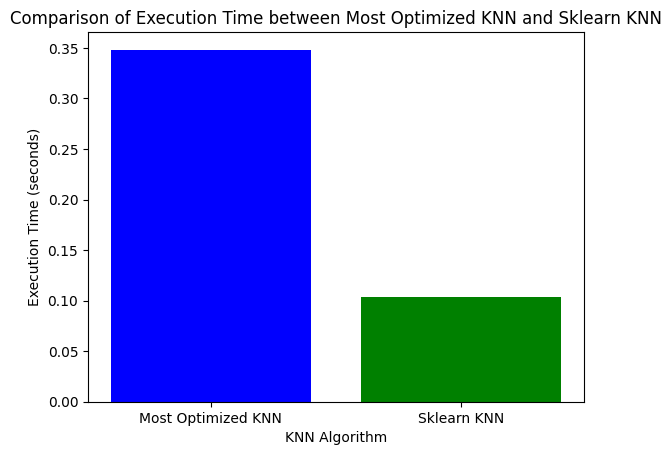

In [14]:
  import numpy as np
import time
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class KNNClassifier:
    def __init__(self, k=5, distance_metric='manhattan', encoder_type=None):
        self.k = k
        self.distance_metric = distance_metric
        self.encoder_type = encoder_type
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
    def train_val_split(self,X, y, test_size=0.2, random_state=42):
        np.random.seed(random_state)
        indices = np.random.permutation(len(X))
        split_index = int(len(X) * (1 - test_size))
        train_indices, val_indices = indices[:split_index], indices[split_index:]
        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_val]
            
        return x_train, x_val, y_train, y_val

    def unshuffled_train_val_split(self,X,y,test_size=0.2):
        total_samples = len(X)
        split_index = int(total_samples * (1 - test_size))

        X_train = X[:split_index]
        X_test = X[split_index:]
        y_train = y[:split_index]
        y_test = y[split_index:]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_test]
        return x_train, x_val, y_train, y_test
    def fit(self, data):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_vit, y)
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_resnet, y)

    def euclidean_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=2)
    def manhattan_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=1)
    def cosine_distance(self, x1, x2) -> float:
        return 1-np.dot(x2,x1)/(np.linalg.norm(x2,axis=1)*np.linalg.norm(x1))
    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return self.manhattan_distance(x1, x2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(x1, x2)
        else:
            raise ValueError("Unsupported distance metric")
    def fitpt2(self, data, X_test):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train = X_vit
            self.y_train = y
            self.X_test = X_test
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train = X_resnet
            self.y_train = y
            self.X_test = X_test
        
    def predict(self):
        y_pred = []
        for x in self.X_test:
            distances = self.calculate_distance(x, self.X_train)
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            pred_label = unique_labels[np.argmax(counts)]
            y_pred.append(pred_label)
def train_val_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_index = int(len(X) * (1 - test_size))
    train_indices, val_indices = indices[:split_index], indices[split_index:]
    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]
    x_train = [item[0][0] for item in X_train]
    x_val = [item[0][0] for item in X_val]
        
    return x_train, x_val, y_train, y_val
data = np.load('data.npy', allow_pickle=True)
X_vit = data[:, 2:3]
y = data[:, 3] 
X_train, X_test, y_train, y_test = train_val_split(X_vit, y)
knn_classifier = KNeighborsClassifier()
start_time = time.time()
vit_knn = KNNClassifier(k=3, distance_metric='manhattan',encoder_type='VIT')
vit_knn.fit(data=data)
vit_knn.predict()
end_time = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
end2_time = time.time()
execution_time = end_time - start_time
execution_time2 = end2_time - end_time
# print(f"Execution time1: {execution_time} seconds")
# print(f"Execution time2: {execution_time2} seconds")
data = {
    'Most Optimized KNN': execution_time,
    'Sklearn KNN': execution_time2
}
labels = list(data.keys())
values = list(data.values())
plt.bar(labels, values, color=['blue', 'green'])
plt.xlabel('KNN Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Time between Most Optimized KNN and Sklearn KNN')
plt.show()



2.6.1.3

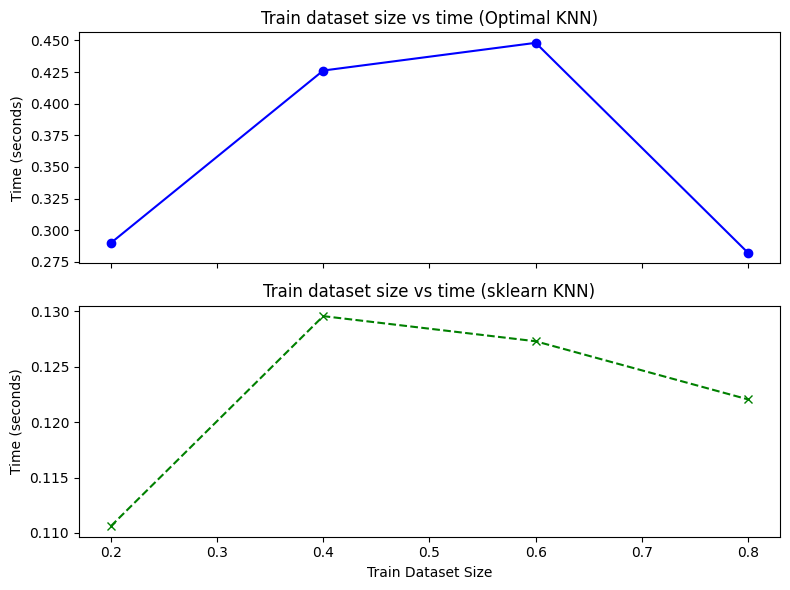

In [21]:
  import numpy as np
import time
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class KNNClassifier:
    def __init__(self, k=5, distance_metric='manhattan', encoder_type=None):
        self.k = k
        self.distance_metric = distance_metric
        self.encoder_type = encoder_type
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
    def train_val_split(self,X, y, test_size=0.2, random_state=42):
        np.random.seed(random_state)
        indices = np.random.permutation(len(X))
        split_index = int(len(X) * (1 - test_size))
        train_indices, val_indices = indices[:split_index], indices[split_index:]
        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_val]
            
        return x_train, x_val, y_train, y_val

    def unshuffled_train_val_split(self,X,y,test_size=0.2):
        total_samples = len(X)
        split_index = int(total_samples * (1 - test_size))

        X_train = X[:split_index]
        X_test = X[split_index:]
        y_train = y[:split_index]
        y_test = y[split_index:]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_test]
        return x_train, x_val, y_train, y_test
    def fit(self, data, testsize):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_vit, y, test_size = testsize)
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_resnet, y, test_size = testsize)

    def euclidean_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=2)
    def manhattan_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=1)
    def cosine_distance(self, x1, x2) -> float:
        return 1-np.dot(x2,x1)/(np.linalg.norm(x2,axis=1)*np.linalg.norm(x1))
    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return self.manhattan_distance(x1, x2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(x1, x2)
        else:
            raise ValueError("Unsupported distance metric")
    def fitpt2(self, data, X_test):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train = X_vit
            self.y_train = y
            self.X_test = X_test
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train = X_resnet
            self.y_train = y
            self.X_test = X_test
        
    def predict(self):
        y_pred = []
        for x in self.X_test:
            distances = self.calculate_distance(x, self.X_train)
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            pred_label = unique_labels[np.argmax(counts)]
            y_pred.append(pred_label)
def train_val_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_index = int(len(X) * (1 - test_size))
    train_indices, val_indices = indices[:split_index], indices[split_index:]
    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]
    x_train = [item[0][0] for item in X_train]
    x_val = [item[0][0] for item in X_val]
        
    return x_train, x_val, y_train, y_val
data = np.load('data.npy', allow_pickle=True)
X_vit = data[:, 2:3]
y = data[:, 3] 
traindatasizes = [0.2,0.4,0.6,0.8]
times = []
for testsize in traindatasizes:
    # X_train, X_test, y_train, y_test = train_val_split(X_vit, y, test_size = testsize)
    # knn_classifier = KNeighborsClassifier()
    start_time = time.time()
    vit_knn = KNNClassifier(k=3, distance_metric='manhattan',encoder_type='VIT')
    vit_knn.fit(data=data, testsize = testsize)
    vit_knn.predict()
    end_time = time.time()
    times.append(end_time-start_time)
times2 = []
for testsize in traindatasizes:
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_val_split(X_vit, y, test_size = testsize)
    knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    end_time = time.time()
    times2.append(end_time-start_time)
    
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot traindataset vs times
ax1.plot(traindatasizes, times, marker='o', linestyle='-', color='b')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('Train dataset size vs time (Optimal KNN)')

# Plot traindataset vs times2
ax2.plot(traindatasizes, times2, marker='x', linestyle='--', color='g')
ax2.set_xlabel('Train Dataset Size')
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Train dataset size vs time (sklearn KNN)')

# Adjust the space between the two subplots
plt.tight_layout()

# Show the plots
plt.show()
# knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
# knn_classifier.fit(X_train, y_train)
# y_pred = knn_classifier.predict(X_test)
# end2_time = time.time()
# execution_time = end_time - start_time
# execution_time2 = end2_time - end_time
# # print(f"Execution time1: {execution_time} seconds")
# # print(f"Execution time2: {execution_time2} seconds")
# data = {
#     'Most Optimized KNN': execution_time,
#     'Sklearn KNN': execution_time2
# }
# labels = list(data.keys())
# values = list(data.values())
# plt.bar(labels, values, color=['blue', 'green'])
# plt.xlabel('KNN Algorithm')
# plt.ylabel('Execution Time (seconds)')
# plt.title('Comparison of Execution Time between Most Optimized KNN and Sklearn KNN')
# plt.show()



3.3.1 (MultiOutput)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

class MultiOutputDecisionTreeClassifier:
    def __init__(self, max_depth=5, max_features='auto', criterion='gini'):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features,criterion=criterion,random_state=42)
    def fit(self, X, y):
        mlb = MultiLabelBinarizer()
        y = mlb.fit_transform(y.str.split(' '))
        self.classifier.fit(X, y)
    def predict(self, X):
        return self.classifier.predict(X)
data = pd.read_csv('advertisement.csv')  # Replace with your CSV file path
data.fillna(method='ffill', inplace=True) 
categorical_cols = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data_encoded.drop('labels', axis=1)  # Features
y = data_encoded['labels']  # Target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
mlb = MultiLabelBinarizer()
# y_train = y_train.str.get_dummies(sep=' ')
# y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val.str.split(' '))
# y_val = y_val.str.get_dummies(sep=' ')
# print(y_val)
clf = MultiOutputDecisionTreeClassifier(max_depth=30, max_features = 11,criterion='entropy')
clf.fit(X_train, y_train)
val_predictions = clf.predict(X_val)
# print(val_predictions)
accuracy = accuracy_score(y_val, val_predictions)
micro_f1 = f1_score(y_val, val_predictions, average='micro')
macro_f1 = f1_score(y_val, val_predictions, average='macro')
conf_matrix = confusion_matrix(y_val.argmax(axis=1), val_predictions.argmax(axis=1))
precision = precision_score(y_val, val_predictions, average='micro')
recall = recall_score(y_val, val_predictions, average='micro')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 (Micro): {micro_f1:.2f}')
print(f'F1 (Macro): {macro_f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Precision (Micro): {precision:.2f}')
print(f'Recall (Micro): {recall:.2f}')
# val_predictions = mlb.inverse_transform(val_predictions)
# y_val = mlb.inverse_transform(y_val)

# Initialize an empty dictionary to store confusion matrices for each label
# confusion_matrices = {}

# # Compute confusion matrix for each label
# for label_idx, label in enumerate(mlb.classes_):
#     y_val_label = [1 if label in labels else 0 for labels in y_val]
#     val_predictions_label = [1 if label in labels else 0 for labels in val_predictions]
#     cm = confusion_matrix(y_val_label, val_predictions_label)
#     confusion_matrices[label] = cm

# # Print confusion matrices for each label
# for label, cm in confusion_matrices.items():
#     print(f'Confusion Matrix for Label "{label}":')
#     print(cm)


Accuracy: 0.02
F1 (Micro): 0.28
F1 (Macro): 0.28
Confusion Matrix:
[[54  7  2  4  0  1  0  0]
 [35  4  5  1  1  0  0  0]
 [18  1  4  2  2  0  0  0]
 [12  2  3  3  0  2  0  0]
 [11  0  1  5  1  0  0  0]
 [ 6  1  0  0  0  1  0  0]
 [ 2  1  1  1  0  0  0  0]
 [ 4  0  1  1  0  0  0  0]]
Precision (Micro): 0.39
Recall (Micro): 0.22


3.3.1 (Powerset)

In [2]:
import numpy as np
import pandas as pd
from itertools import chain, combinations
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

class PowersetDecisionTreeClassifier:
    def __init__(self, max_depth=5, max_features='auto', criterion='gini'):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features,criterion=criterion,random_state=42)
    def fit(self, X, y):
        self.classifier.fit(X, y)
    def predict(self, X):
        return self.classifier.predict(X)
data = pd.read_csv('advertisement.csv')  # Replace with your CSV file path
# print("Original DataFrame:")
# print(data.head())
data.fillna(method='ffill', inplace=True) 
categorical_cols = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
# print("Encoded DataFrame:")
# print(data_encoded.head())
X = data_encoded.drop('labels', axis=1)  # Features
y = data_encoded['labels']  # Target variable
# print(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# print(y_train)
def powerset(iterable):
    s = list(iterable)
    unique_combos = set()
    for r in range(len(s),len(s) + 1):
        for combo in combinations(sorted(s), r):
            return tuple((combo))
            unique_combos.add(tuple(combo))
    return list(unique_combos)
label_combinations = y_train.apply(lambda x: tuple(x.split(' '))).apply(powerset)
label_combinations_val = y_val.apply(lambda x: tuple(x.split(' '))).apply(powerset)
# print(label_combinations)

all_label_combinations = list(set(label_combinations.sum() + label_combinations_val.sum()))
unique_labels = y.str.split(' ').explode().unique()  
all_label_combinations = list(chain.from_iterable(combinations(unique_labels, r) for r in range(len(unique_labels) + 1)))
label_combinations_list = label_combinations.tolist()
label_combinations_val_list = label_combinations_val.tolist()
#print(label_combinations_list)
# print(label_combinations_val_list)
# all_label_combinations.sort()
all_label_combinations = sorted(all_label_combinations, key=lambda x: tuple(sorted(x)))
mlb = MultiLabelBinarizer(classes=np.arange(len(all_label_combinations)))
mlb.fit(all_label_combinations)

def custom_binarize(label_combination):
    binarized = np.zeros(len(all_label_combinations))
    for idx, label_set in enumerate(all_label_combinations):
        if set(label_set) == set(label_combination):
            binarized[idx] = 1
    return binarized

# Binarize y_train and y_val using the custom binarization function
# label_combinations_list.sort()
# label_combinations_val_list.sort()
# print(label_combinations_list)
y_train = np.array([custom_binarize(labels) for labels in label_combinations_list])
y_val = np.array([custom_binarize(labels) for labels in label_combinations_val_list])
# print(y_val)
# y_train = mlb.fit_transform(label_combinations_list)
# y_train_df = pd.DataFrame(y_train, columns=mlb.classes_)
# y_train = y_train_df.loc[:, ~y_train_df.columns.duplicated()]
# y_val = mlb.fit_transform(label_combinations_val_list)
# y_val_df = pd.DataFrame(y_val, columns=mlb.classes_)
# # # Remove duplicate columns, if any
# y_val = y_val_df.loc[:, ~y_val_df.columns.duplicated()]
# # y_val = mlb.fit_transform(y_val.apply(lambda x: tuple(x.split(' '))))
#print(y_train)
# print(y_val)
clf = PowersetDecisionTreeClassifier(max_depth=30, max_features = 1100,criterion='entropy')
clf.fit(X_train, y_train)
# print(X_train)
val_predictions = clf.predict(X_val)
# print(val_predictions)
# y_val = y_val.to_numpy()
# print(val_predictions)
# print(np.sum(val_predictions))
accuracy = accuracy_score(y_val, val_predictions)
micro_f1 = f1_score(y_val, val_predictions, average='micro',zero_division=0)
macro_f1 = f1_score(y_val, val_predictions, average='macro',zero_division=0)
conf_matrix = confusion_matrix(y_val.argmax(axis=1), val_predictions.argmax(axis=1))
precision = precision_score(y_val, val_predictions, average='micro')
recall = recall_score(y_val, val_predictions, average='micro')

print(f'Accuracy: {accuracy:.5f}')
print(f'F1 (Micro): {micro_f1:.5f}')
print(f'F1 (Macro): {macro_f1:.5f}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Precision (Micro): {precision:.2f}')
print(f'Recall (Micro): {recall:.2f}')
# val_predictions = mlb.inverse_transform(val_predictions)
# y_val = mlb.inverse_transform(y_val)

# Initialize an empty dictionary to store confusion matrices for each label
# confusion_matrices = {}

# # Compute confusion matrix for each label
# for label_idx, label in enumerate(mlb.classes_):
#     y_val_label = [1 if label in labels else 0 for labels in y_val]
#     val_predictions_label = [1 if label in labels else 0 for labels in val_predictions]
#     cm = confusion_matrix(y_val_label, val_predictions_label)
#     confusion_matrices[label] = cm

# # Print confusion matrices for each label
# for label, cm in confusion_matrices.items():
#     print(f'Confusion Matrix for Label "{label}":')
#     print(cm)

Accuracy: 0.00000
F1 (Micro): 0.00000
F1 (Macro): 0.00000
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Precision (Micro): 0.00
Recall (Micro): 0.00


3.4.1.1 (MultiOutput)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

class MultiOutputDecisionTreeClassifier:
    def __init__(self, max_depth=5, max_features='auto', criterion='gini'):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features,criterion=criterion,random_state=42)
    def fit(self, X, y):
        self.classifier.fit(X, y)
    def predict(self, X):
        return self.classifier.predict(X)
data = pd.read_csv('advertisement.csv')  # Replace with your CSV file path
data.fillna(method='ffill', inplace=True) 
categorical_cols = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data_encoded.drop('labels', axis=1)  # Features
y = data_encoded['labels']  # Target variable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
mlb = MultiLabelBinarizer()
# y_train = y_train.str.get_dummies(sep=' ')
y_train = mlb.fit_transform(y_train.str.split(' '))
y_val = mlb.fit_transform(y_val.str.split(' '))
for i in [3,5,10,20,30]:
    for j in [3,5,7,9,11]:
        for k in ['gini','entropy']:            
            clf = MultiOutputDecisionTreeClassifier(max_depth=i, max_features = j,criterion=k)
            clf.fit(X_train, y_train)
            val_predictions = clf.predict(X_val)
            # print(val_predictions)
            accuracy = accuracy_score(y_val, val_predictions)
            micro_f1 = f1_score(y_val, val_predictions, average='micro',zero_division=0)
            macro_f1 = f1_score(y_val, val_predictions, average='macro',zero_division=0)
            conf_matrix = confusion_matrix(y_val.argmax(axis=1), val_predictions.argmax(axis=1))
            precision = precision_score(y_val, val_predictions, average='micro',zero_division=0)
            recall = recall_score(y_val, val_predictions, average='micro',zero_division=0)
            print("Max Depth: " + str(i) + " Max Features: " + str(j) + " Criterion: " + str(k))
            print(f'Accuracy: {accuracy:.2f}')
            print(f'F1 (Micro): {micro_f1:.2f}')
            print(f'F1 (Macro): {macro_f1:.2f}')
            print('Confusion Matrix:')
            print(conf_matrix)
            print(f'Precision (Micro): {precision:.2f}')
            print(f'Recall (Micro): {recall:.2f}')
# val_predictions = mlb.inverse_transform(val_predictions)
# y_val = mlb.inverse_transform(y_val)

# Initialize an empty dictionary to store confusion matrices for each label
# confusion_matrices = {}

# # Compute confusion matrix for each label
# for label_idx, label in enumerate(mlb.classes_):
#     y_val_label = [1 if label in labels else 0 for labels in y_val]
#     val_predictions_label = [1 if label in labels else 0 for labels in val_predictions]
#     cm = confusion_matrix(y_val_label, val_predictions_label)
#     confusion_matrices[label] = cm

# # Print confusion matrices for each label
# for label, cm in confusion_matrices.items():
#     print(f'Confusion Matrix for Label "{label}":')
#     print(cm)


Max Depth: 3 Max Features: 3 Criterion: gini
Accuracy: 0.00
F1 (Micro): 0.00
F1 (Macro): 0.00
Confusion Matrix:
[[68  0  0  0  0  0  0  0]
 [46  0  0  0  0  0  0  0]
 [27  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0]]
Precision (Micro): 0.00
Recall (Micro): 0.00
Max Depth: 3 Max Features: 3 Criterion: entropy
Accuracy: 0.00
F1 (Micro): 0.00
F1 (Macro): 0.00
Confusion Matrix:
[[68  0  0  0  0  0  0  0]
 [46  0  0  0  0  0  0  0]
 [27  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0]]
Precision (Micro): 0.00
Recall (Micro): 0.00
Max Depth: 3 Max Features: 5 Criterion: gini
Accuracy: 0.00
F1 (Micro): 0.00
F1 (Macro): 0.00
Confusion Matrix:
[[68  0  0  0  0  0  0  0]
 [46  0  0  0  0  0  0  0]
 [27  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [

3.4.1.1 (Powerset)

In [5]:
import numpy as np
import pandas as pd
from itertools import chain, combinations
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

class PowersetDecisionTreeClassifier:
    def __init__(self, max_depth=5, max_features='auto', criterion='gini'):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = DecisionTreeClassifier(max_depth = max_depth, max_features=max_features,criterion=criterion,random_state=42)
    def fit(self, X, y):
        self.classifier.fit(X, y)
    def predict(self, X):
        return self.classifier.predict(X)
data = pd.read_csv('advertisement.csv')  # Replace with your CSV file path
# print("Original DataFrame:")
# print(data.head())
data.fillna(method='ffill', inplace=True) 
categorical_cols = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
# print("Encoded DataFrame:")
# print(data_encoded.head())
X = data_encoded.drop('labels', axis=1)  # Features
y = data_encoded['labels']  # Target variable
# print(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# print(y_train)
def powerset(iterable):
    s = list(iterable)
    unique_combos = set()
    for r in range(len(s),len(s) + 1):
        for combo in combinations(sorted(s), r):
            return tuple(combo)
            unique_combos.add(tuple(combo))
    return list(unique_combos)
label_combinations = y_train.apply(lambda x: tuple(x.split(' '))).apply(powerset)
label_combinations_val = y_val.apply(lambda x: tuple(x.split(' '))).apply(powerset)
# print(label_combinations)

all_label_combinations = list(set(label_combinations.sum() + label_combinations_val.sum()))
unique_labels = y.str.split(' ').explode().unique()  
all_label_combinations = list(chain.from_iterable(combinations(unique_labels, r) for r in range(len(unique_labels) + 1)))
label_combinations_list = label_combinations.tolist()
label_combinations_val_list = label_combinations_val.tolist()
#print(label_combinations_list)
all_label_combinations = sorted(all_label_combinations, key=lambda x: tuple(sorted(x)))
mlb = MultiLabelBinarizer(classes=np.arange(len(all_label_combinations)))
mlb.fit(all_label_combinations)
def custom_binarize(label_combination):
    binarized = np.zeros(len(all_label_combinations))
    for idx, label_set in enumerate(all_label_combinations):
        if set(label_set) == set(label_combination):
            binarized[idx] = 1
    return binarized

# Binarize y_train and y_val using the custom binarization function
# print(y_val)
y_train = np.array([custom_binarize(labels) for labels in label_combinations_list])
y_val = np.array([custom_binarize(labels) for labels in label_combinations_val_list])
# y_train = mlb.fit_transform(label_combinations_list)
# y_train_df = pd.DataFrame(y_train, columns=mlb.classes_)
# y_train = y_train_df.loc[:, ~y_train_df.columns.duplicated()]
# y_val = mlb.fit_transform(label_combinations_val_list)
# y_val_df = pd.DataFrame(y_val, columns=mlb.classes_)
# # # Remove duplicate columns, if any
# y_val = y_val_df.loc[:, ~y_val_df.columns.duplicated()]
# # y_val = mlb.fit_transform(y_val.apply(lambda x: tuple(x.split(' '))))
#print(y_train)
# print(y_val)
# print(np.sum(y_val[1]))
for i in [3,5,10,20,30]:
    for j in [3,5,7,9,11]:
            for k in ['gini','entropy']:  
                clf = PowersetDecisionTreeClassifier(max_depth=i, max_features = j,criterion=k)
                clf.fit(X_train, y_train)
                val_predictions = clf.predict(X_val)
                # print(val_predictions)
                # y_val = y_val.to_numpy()
                # print(np.sum(y_val[0]))
                # print(val_predictions)
                accuracy = accuracy_score(y_val, val_predictions)
                micro_f1 = f1_score(y_val, val_predictions, average='micro',zero_division=0)
                macro_f1 = f1_score(y_val, val_predictions, average='macro',zero_division=0)
                conf_matrix = confusion_matrix(y_val.argmax(axis=1), val_predictions.argmax(axis=1))
                precision = precision_score(y_val, val_predictions, average='micro',zero_division=0)
                recall = recall_score(y_val, val_predictions, average='micro',zero_division=0)
                print("Max Depth: " + str(i) + " Max Features: " + str(j) + " Criterion: " + str(k))
                print(f'Accuracy: {accuracy:.5f}')
                print(f'F1 (Micro): {micro_f1:.5f}')
                print(f'F1 (Macro): {macro_f1:.5f}')
                print('Confusion Matrix:')
                print(conf_matrix)
                print(f'Precision (Micro): {precision:.5f}')
                print(f'Recall (Micro): {recall:.5f}')
# val_predictions = mlb.inverse_transform(val_predictions)
# y_val = mlb.inverse_transform(y_val)

# Initialize an empty dictionary to store confusion matrices for each label
# confusion_matrices = {}

# # Compute confusion matrix for each label
# for label_idx, label in enumerate(mlb.classes_):
#     y_val_label = [1 if label in labels else 0 for labels in y_val]
#     val_predictions_label = [1 if label in labels else 0 for labels in val_predictions]
#     cm = confusion_matrix(y_val_label, val_predictions_label)
#     confusion_matrices[label] = cm

# # Print confusion matrices for each label
# for label, cm in confusion_matrices.items():
#     print(f'Confusion Matrix for Label "{label}":')
#     print(cm)

Max Depth: 3 Max Features: 3 Criterion: gini
Accuracy: 0.00000
F1 (Micro): 0.00000
F1 (Macro): 0.00000
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]]
Precision (Micro): 0.00000
Recall (Micro): 0.00000
Max Depth: 3 Max Features: 3 Criterion: entropy
Accuracy: 0.00000
F1 (Micro): 0.00000
F1 (Macro): 0.00000
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]]
Precision (Micro): 0.00000
Recall (Micro): 0.00000
Max Depth: 3 Max Features: 5 Criterion: gini
Accuracy: 0.00000
F1 (Micro): 0.00000
F1 (Macro): 0.00000
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]]
Precision (Micro): 0.00000
Recall (Micro): 0.00000
Max Depth: 3 Max Features: 5 Criterion: entropy
Accuracy: 0.00000
F1 (Micro): 0.00000
F1 (Macro): 0.00000
Confusion Matri

3.4.1.2 (MultiOutput)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

class MultiOutputDecisionTreeClassifier:
    def __init__(self, max_depth, max_features, criterion):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = DecisionTreeClassifier(max_depth=max_depth, max_features = max_features,criterion=criterion,random_state=42)
    def fit(self, X, y):
        self.classifier.fit(X, y)
    def predict(self, X):
        return self.classifier.predict(X)
data = pd.read_csv('advertisement.csv') 
data.fillna(method='ffill', inplace=True) 
categorical_cols = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data_encoded.drop('labels', axis=1) 
y = data_encoded['labels'] 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
# test_size = 0.2

# # Calculate the number of data points to reserve for testing
# num_test_samples = int(len(X) * test_size)

# # Create the training and testing sets without shuffling
# X_train, X_val = X[:num_test_samples], X[num_test_samples:]
# y_train, y_val = y[:num_test_samples], y[num_test_samples:]
mlb = MultiLabelBinarizer()
# y_train = y_train.str.get_dummies(sep=' ')
y_train = mlb.fit_transform(y_train.str.split(' '))
y_val = mlb.fit_transform(y_val.str.split(' '))
# print(y_train[1])
ans = []
ans1 = []
for i in [3,5,10,20,30]:
    for j in [3,5,7,9,11]:
        for k in ['gini','entropy']:
            clf = MultiOutputDecisionTreeClassifier(max_depth=i, max_features = j,criterion=k)
            clf.fit(X_train, y_train)
            val_predictions = clf.predict(X_val)
            # print(y_val)
            macro_f1 = f1_score(y_val, val_predictions, average='macro')
            micro_f1 = f1_score(y_val, val_predictions, average='micro')
            ans.append([macro_f1,i,j,k])
            ans1.append([micro_f1,i,j,k])
ans.sort(reverse=True)
ans1.sort(reverse=True)
print("According to F1 Macro: ")
for i in range(0,3):
    print("F1 Score: " + str(ans[i][0]) + " Max Depth: " + str(ans[i][1]) + " Max Features: " + str(ans[i][2]) + " Criterion: " + str(ans[i][3]))
print("According to F1 Micro: ")
for i in range(0,3):
    print("F1 Score: " + str(ans1[i][0]) + " Max Depth: " + str(ans1[i][1]) + " Max Features: " + str(ans1[i][2]) + " Criterion: " + str(ans1[i][3]))



According to F1 Macro: 
F1 Score: 0.27865461577777884 Max Depth: 30 Max Features: 11 Criterion: entropy
F1 Score: 0.2204384666342164 Max Depth: 30 Max Features: 11 Criterion: gini
F1 Score: 0.2168795618589115 Max Depth: 20 Max Features: 9 Criterion: gini
According to F1 Micro: 
F1 Score: 0.27941176470588236 Max Depth: 30 Max Features: 11 Criterion: entropy
F1 Score: 0.2287308228730823 Max Depth: 30 Max Features: 11 Criterion: gini
F1 Score: 0.22286541244573085 Max Depth: 20 Max Features: 9 Criterion: gini


3.4.1.2 (Powerset)

In [2]:
import numpy as np
import pandas as pd
from itertools import chain, combinations
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

class PowersetDecisionTreeClassifier:
    def __init__(self, max_depth=5, max_features='auto', criterion='gini'):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = DecisionTreeClassifier(max_depth = max_depth, max_features=max_features,criterion=criterion,random_state=42)
    def fit(self, X, y):
        self.classifier.fit(X, y)
    def predict(self, X):
        return self.classifier.predict(X)
data = pd.read_csv('advertisement.csv') 
data.fillna(method='ffill', inplace=True) 
categorical_cols = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data_encoded.drop('labels', axis=1)  
y = data_encoded['labels']  
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
def powerset(iterable):
    s = list(iterable)
    unique_combos = set()
    for r in range(len(s),len(s) + 1):
        for combo in combinations(sorted(s), r):
            return tuple(combo)
            unique_combos.add(tuple(combo))
    return list(unique_combos)
label_combinations = y_train.apply(lambda x: tuple(x.split(' '))).apply(powerset)
label_combinations_val = y_val.apply(lambda x: tuple(x.split(' '))).apply(powerset)
all_label_combinations = list(set(label_combinations.sum() + label_combinations_val.sum()))
unique_labels = y.str.split(' ').explode().unique()  
all_label_combinations = list(chain.from_iterable(combinations(unique_labels, r) for r in range(len(unique_labels) + 1)))
label_combinations_list = label_combinations.tolist()
label_combinations_val_list = label_combinations_val.tolist()
all_label_combinations = sorted(all_label_combinations, key=lambda x: tuple(sorted(x)))
mlb = MultiLabelBinarizer(classes=np.arange(len(all_label_combinations)))
mlb.fit(all_label_combinations)
def custom_binarize(label_combination):
    binarized = np.zeros(len(all_label_combinations))
    for idx, label_set in enumerate(all_label_combinations):
        if set(label_set) == set(label_combination):
            binarized[idx] = 1
    return binarized

# Binarize y_train and y_val using the custom binarization function
# print(label_combinations_list[0])
# print(label_combinations_val_list[0])
y_train = np.array([custom_binarize(labels) for labels in label_combinations_list])
y_val = np.array([custom_binarize(labels) for labels in label_combinations_val_list])
# print(np.sum(y_train[0])
# )
# y_train = mlb.fit_transform(label_combinations_list)
# y_train_df = pd.DataFrame(y_train, columns=mlb.classes_)
# y_train = y_train_df.loc[:, ~y_train_df.columns.duplicated()]
# y_val = mlb.fit_transform(label_combinations_val_list)
# y_val_df = pd.DataFrame(y_val, columns=mlb.classes_)
# # # Remove duplicate columns, if any
# y_val = y_val_df.loc[:, ~y_val_df.columns.duplicated()]
# # y_val = mlb.fit_transform(y_val.apply(lambda x: tuple(x.split(' '))))
#print(y_train)
# print(y_val)
# print(np.sum(y_val[1]))
ans = []
ans1 = []
for i in [3,5,10,20,30]:
    for j in [3,5,7,9,11]:
            for k in ['gini','entropy']:  
                clf = PowersetDecisionTreeClassifier(max_depth=i, max_features = j,criterion=k)
                clf.fit(X_train, y_train)
                val_predictions = clf.predict(X_val)
                # sum = 0
                # for i in range(len(val_predictions)):
                #     sum = sum + np.sum(val_predictions[i])
                # print(sum)
                # y_val = y_val.to_numpy()
                # print(np.sum(y_val[0]))
                # print(val_predictions)
                micro_f1 = f1_score(y_val, val_predictions, average='micro', zero_division=0)
                macro_f1 = f1_score(y_val, val_predictions, average='macro',zero_division=0)
                ans.append([macro_f1,i,j,k,val_predictions])
                ans1.append([micro_f1,i,j,k,val_predictions])
ans.sort(reverse=True)
ans1.sort(reverse=True)
print("According to F1 Macro: ")
for i in range(0,3):
    print("F1 Score: " + str(ans[i][0]) + " Max Depth: " + str(ans[i][1]) + " Max Features: " + str(ans[i][2]) + " Criterion: " + str(ans[i][3]))
print("According to F1 Micro: ")
for i in range(0,3):
    print("F1 Score: " + str(ans1[i][0]) + " Max Depth: " + str(ans1[i][1]) + " Max Features: " + str(ans1[i][2]) + " Criterion: " + str(ans1[i][3]))
# val_predictions = mlb.inverse_transform(val_predictions)
# y_val = mlb.inverse_transform(y_val)

# Initialize an empty dictionary to store confusion matrices for each label
# confusion_matrices = {}

# # Compute confusion matrix for each label
# for label_idx, label in enumerate(mlb.classes_):
#     y_val_label = [1 if label in labels else 0 for labels in y_val]
#     val_predictions_label = [1 if label in labels else 0 for labels in val_predictions]
#     cm = confusion_matrix(y_val_label, val_predictions_label)
#     confusion_matrices[label] = cm

# # Print confusion matrices for each label
# for label, cm in confusion_matrices.items():
#     print(f'Confusion Matrix for Label "{label}":')
#     print(cm)

According to F1 Macro: 
F1 Score: 0.00390625 Max Depth: 20 Max Features: 11 Criterion: entropy
F1 Score: 0.0026785714285714286 Max Depth: 30 Max Features: 7 Criterion: entropy
F1 Score: 0.0015625 Max Depth: 30 Max Features: 5 Criterion: entropy
According to F1 Micro: 
F1 Score: 0.017467248908296946 Max Depth: 30 Max Features: 7 Criterion: entropy
F1 Score: 0.009433962264150943 Max Depth: 30 Max Features: 5 Criterion: entropy
F1 Score: 0.008928571428571428 Max Depth: 30 Max Features: 9 Criterion: gini


3.4.1.3 (MultiOutput)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

class MultiOutputDecisionTreeClassifier:
    def __init__(self, max_depth=5, max_features='auto', criterion='gini'):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features,criterion=criterion,random_state=42)
    def fit(self, X, y):
        mlb = MultiLabelBinarizer()
        y = mlb.fit_transform(y.str.split(' '))
        self.classifier.fit(X, y)
    def predict(self, X):
        return self.classifier.predict(X)
data = pd.read_csv('advertisement.csv')  # Replace with your CSV file path
data.fillna(method='ffill', inplace=True) 
categorical_cols = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data_encoded.drop('labels', axis=1)  # Features
y = data_encoded['labels']  # Target variable
K = 5
validation_indices = []
n = len(X)
for i in range(K):
    start = (n // K) * i
    end = (n // K) * (i + 1)
    val_indices = list(range(start, end))
    train_indices = list(set(range(n)) - set(val_indices))
    validation_indices.append((train_indices, val_indices))
accuracies = []
f1_macros = []
f1_micros = []
precisions = []
recalls = []
for i,(train_indices,val_indices) in enumerate(validation_indices):
    # X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/K,random_state=42+_)
    # train_indices = np.setdiff1d(np.arange(n), val_indices)
    # print(train_indices)
    # print(val_indices)
    # print(X.iloc[train_indices])
    # print(X.iloc[val_indices])
    X_train, X_val = X.iloc[train_indices], X.iloc[val_indices]
    # y_train, y_val = y[train_indices], y[val_indices]
    y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]
    mlb = MultiLabelBinarizer()
    y_val = mlb.fit_transform(y_val.str.split(' '))
    clf = MultiOutputDecisionTreeClassifier(max_depth=30, max_features = 1100,criterion='entropy')
    clf.fit(X_train, y_train)
    val_predictions = clf.predict(X_val)
    # print(val_predictions)
    accuracy = accuracy_score(y_val, val_predictions)
    micro_f1 = f1_score(y_val, val_predictions, average='micro',zero_division=0)
    macro_f1 = f1_score(y_val, val_predictions, average='macro',zero_division=0)
    conf_matrix = confusion_matrix(y_val.argmax(axis=1), val_predictions.argmax(axis=1))
    precision = precision_score(y_val, val_predictions, average='micro',zero_division=0)
    recall = recall_score(y_val, val_predictions, average='micro',zero_division=0)
    # print(accuracy)
    accuracies.append(accuracy)
    f1_macros.append(macro_f1)
    f1_micros.append(micro_f1)
    precisions.append(precision)
    recalls.append(recall)
    # print(f'Accuracy: {accuracy:.2f}')
    # print(f'F1 (Micro): {micro_f1:.2f}')
    # print(f'F1 (Macro): {macro_f1:.2f}')
    # print('Confusion Matrix:')
    # print(conf_matrix)
    # print(f'Precision (Micro): {precision:.2f}')
    # print(f'Recall (Micro): {recall:.2f}')
print("AVERAGES")
print("Accuracy: ",end="")
print(np.mean(accuracies))
print("Macro F1 Score: ",end="")
print(np.mean(f1_macros))
print("Micro F1 Score: ",end="")
print(np.mean(f1_micros))
print("Precision: ",end="")
print(np.mean(precisions))
print("Recall: ",end="")
print(np.mean(recalls))


AVERAGES
Accuracy: 0.036000000000000004
Macro F1 Score: 0.5065104529890514
Micro F1 Score: 0.508448223210882
Precision: 0.5203823329241899
Recall: 0.49750131673795767


3.4.1.3 (Powerset)

In [2]:
import numpy as np
import pandas as pd
from itertools import chain, combinations
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import KFold

class PowersetDecisionTreeClassifier:
    def __init__(self, max_depth=5, max_features='auto', criterion='gini'):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features,criterion=criterion,random_state=42)
    def fit(self, X, y):
        self.classifier.fit(X, y)
    def predict(self, X):
        return self.classifier.predict(X)
data = pd.read_csv('advertisement.csv')  # Replace with your CSV file path
# print("Original DataFrame:")
# print(data.head())
data.fillna(method='ffill', inplace=True) 
categorical_cols = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
# print("Encoded DataFrame:")
# print(data_encoded.head())
X = data_encoded.drop('labels', axis=1)  # Features
y = data_encoded['labels']  # Target variable
# print(y)
K = 5
# validation_indices = []
# n = len(X)
# for i in range(K):
#     start = (n // K) * i
#     end = (n // K) * (i + 1)
#     val_indices = list(range(start, end))
#     train_indices = list(set(range(n)) - set(val_indices))
#     validation_indices.append((train_indices, val_indices))
kf = KFold(n_splits=K)
accuracies = []
f1_macros = []
f1_micros = []
precisions = []
recalls = []
for i,(train_indices,val_indices) in enumerate(kf.split(data)):
    # print(val_indices)
    X_train, X_val = X.iloc[train_indices], X.iloc[val_indices]
    # y_train, y_val = y[train_indices], y[val_indices]
    y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]
    # print(y_train)
    def powerset(iterable):
        s = list(iterable)
        unique_combos = set()
        for r in range(len(s),len(s) + 1):
            for combo in combinations(sorted(s), r):
                return tuple((combo))
                unique_combos.add(tuple(combo))
        return list(unique_combos)
    label_combinations = y_train.apply(lambda x: tuple(x.split(' '))).apply(powerset)
    label_combinations_val = y_val.apply(lambda x: tuple(x.split(' '))).apply(powerset)
    # print(label_combinations)

    all_label_combinations = list(set(label_combinations.sum() + label_combinations_val.sum()))
    unique_labels = y.str.split(' ').explode().unique()  
    all_label_combinations = list(chain.from_iterable(combinations(unique_labels, r) for r in range(len(unique_labels) + 1)))
    label_combinations_list = label_combinations.tolist()
    label_combinations_val_list = label_combinations_val.tolist()
    #print(label_combinations_list)
    # print(label_combinations_val_list)
    # all_label_combinations.sort()
    all_label_combinations = sorted(all_label_combinations, key=lambda x: tuple(sorted(x)))
    mlb = MultiLabelBinarizer(classes=np.arange(len(all_label_combinations)))
    mlb.fit(all_label_combinations)

    def custom_binarize(label_combination):
        binarized = np.zeros(len(all_label_combinations))
        for idx, label_set in enumerate(all_label_combinations):
            if set(label_set) == set(label_combination):
                binarized[idx] = 1
        return binarized

    y_train = np.array([custom_binarize(labels) for labels in label_combinations_list])
    y_val = np.array([custom_binarize(labels) for labels in label_combinations_val_list])

    clf = PowersetDecisionTreeClassifier(max_depth=20, max_features = 11,criterion='entropy')
    clf.fit(X_train, y_train)
    val_predictions = clf.predict(X_val)

    accuracy = accuracy_score(y_val, val_predictions)
    micro_f1 = f1_score(y_val, val_predictions, average='micro',zero_division=0)
    macro_f1 = f1_score(y_val, val_predictions, average='macro',zero_division=0)
    conf_matrix = confusion_matrix(y_val.argmax(axis=1), val_predictions.argmax(axis=1))
    precision = precision_score(y_val, val_predictions, average='micro')
    recall = recall_score(y_val, val_predictions, average='micro')
    accuracies.append(accuracy)
    f1_macros.append(macro_f1)
    f1_micros.append(micro_f1)
    precisions.append(precision)
    recalls.append(recall)
print("AVERAGES")
print("Accuracy: ",end="")
print(np.mean(accuracies))
print("Macro F1 Score: ",end="")
print(np.mean(f1_macros))
print("Micro F1 Score: ",end="")
print(np.mean(f1_micros))
print("Precision: ",end="")
print(np.mean(precisions))
print("Recall: ",end="")
print(np.mean(recalls))

AVERAGES
Accuracy: 0.002
Macro F1 Score: 0.0004836309523809524
Micro F1 Score: 0.0031568132997104696
Precision: 0.00752990851513019
Recall: 0.002
